# 5340 Fall 2023
# Notebook 2


# Part II: Ordinary Differential Equations

### Readings for Part II
 
 * From Solomon, Chapter 13: all sections.
 * From Kolmogorov and Fomin, Chapter 2: section 8

# Generalities about Ordinary Differential Equations

## Definitions:
 
A function $f:\mathbb{R}^d\times I \to \mathbb{R}^d$ (here $I=[t_0,t_1]$) gives rise to a differential equation over $I$, 

$$ \dot x(t) = f(x(t),t) \text{ for all } t \in I$$

A function $x:I\to\mathbb{R}^d$ is called a classical solution of the differential equation if it is differentiable in the open interval $(t_0,t_1)$ continuous in $[t_0,t_1]$, and for every $t \in I$ the relation above holds. A weak solution is a continuous function in $I$ solving the following **integral equation**

$$ x(t) = x(t_0) + \int_{t_0}^t f(x(s),s)\;ds \;\forall\;t\in I$$

For continuously differentiable functions these two notions of solution coincide. 

The differential equation is also called a system. The number $d$ is called the dimension of the differential equation or the dimension of the system.

An **Initial Value Problem** is the combination of a differential equation with an initial value for the solution, so, it consists in the problem of finding a function $x:I\to\mathbb{R}^d$ such that

$$ \dot x(t) = f(x(t),t) \text{ for all } t \in I,\; x(t_0) = x_0 $$

# Exercises

1. Suppose we wish to solve the ODE $\dot x(t) = −\sin(x(t)$ numerically. For time step $h > 0$, write the implicit backward Euler scheme for approximating $x_{k+1}$ given $x_k$, for what range of values of $h$ can we guarantee that the implicit equation has exactly one solution for all $k$? Implement the implicy Euler scheme for ths equation using `scipy.optimize.root` to solve the implicit equation at every step. Create a function that takes as input an initial data $x_0$, a time $T>0$ and time step $h>0$ and returns the numerical solution in the interval $[0,T]$ starting at $x_0$ with a time step $h$. Plot your solution for the initial data starting at $x(t) = np.pi/4$ with $T=5$ and $h=0.01$.

2. Use `scipy.integrate` to create a numerical solution to Newton's equation for an object orbiting around a fixed mass (placed the origin of coordinates), with the orbiting object starting at $x_0 = [1.0,0.0]$ with velocity $v_0 = [-0.3,1]$. Take the masses of both objects equal to $1$ and use $G=1$ instead of the usual Gravitational Constant. Use a time step of $h=0.02$ and plot the solution in the interval $[0,20]$. Then, use `matploblib.animation` to create an animation of your solution, using 1000 frames and an interval $=1$.

3. Consider the vector space $$X_\lambda = \{ x:[0,\infty) \to \mathbb{R}^d \mid x \text{ is continuous and } \sup\{|e^{-\lambda t}x(t)|:t\in[0,\infty)\} < \infty \} $$ equipped with the norm $$ \|x\|_{X_\lambda} := \sup |e^{-\lambda t}x(t)|$$ Show that the map $$T:X_\lambda \to X_\lambda,\;(Tx)(t) := x_0 + \int_0^tf(x(s),s)\;ds$$ is a contraction mapping if $\lambda>L$, where $L$ is the Lipschitz constant of $f(x,s)$ with respect to $x$.

4. An important linear differential equation is that given by a symmetric $n\times n$ matrix $A$, $$\dot x(t) = Ax(t)$$ Show that
    1. For every solution $x(t)$ and every $y \in \mathbb{R}^n$, $\frac{d}{dt}(x(t),y) = (x(t),Ay)$ for all times $t$
    2. If $A$ is positive semi-definite then for every non-zero solution $x(t)$ we have $t\mapsto \|x(t)\|^2$ is strictly decreasing in time.
    3. If $A$ is negative definite and the smallest eigenvalue of $-A$ is $\lambda_0$, then $$ \frac{d}{dt}\|x(t)\|^2 \leq -2\lambda_0\|x(t)\|^2$$
5. (Heat equation on a graph) Every graph $(G,V)$ provides an interesting example of a (linear) differential equation, having the form $$\partial_t f(x_i,t) = (Lf)(x_i,t) := \sum \limits_{j} w_{ij}(f(x_j,t)-f(x_i,t))$$ where $w_{ij}\geq 0$ are the graph weights. Show the following properties of this system 
  1. The average of $f(x_i,t)$ over $G$ is constant in time, that is $$\sum \limits_{i=1}^nf(x_i,t) = \sum \limits_{i=1}^nf(x_i,0)$$ 
  2. If the smallest non-zero eigenvalue of $-L$ is equal to $\lambda_0$, then $$ \|f(t)-m\|_2 \leq e^{-\lambda_0 t}\|f(0)-m\|_2$$ where $m$ is equal to $\sum \limits_{i=1}^nf(x_i,0)$
  3. If $i_0$ and $t_0$ are such that $f(x_{i_0},t_0) \geq f(x_i,t_0)$ for all $i$, then $\partial_t f(x_{i_0},t_0)\leq 0$ and $\partial_t f(x_{i_0},t_0) = 0$ only if $f(x_i,t)$ is a constant function in $i$ and $t$.
    
6. Let $G$ be the graph obtained by intersecting the grid $L^*\mathbb{Z}^2$ with the unit square $[-1,1]^2$, let $f:G\to \mathbb{R}$ be the characteristic function of the square $[-r,r]^2$, so $f(x_i) = 1$ if $x_i \in G \cap [-r,r]^2$ and $0$ otherwise. Use `scipy.integate` to compute the numerical solution for the heat equation in $G$ with this initial data when $L=0.01$ and $r=0.5$, using a time step of $h=0.01$. Use `matplotlib.animate` to plot the solution by plotting the points of $G$ with a color according to the value of the solution.

In [44]:
# SAMPLE CODE
# Using scipy.integrate and matplotlib.animate

import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


%matplotlib inline
%matplotlib notebook

def HooksLawAnisotropic(x,t,omega=1):
    A = np.array([[1.0,0],[0,omega]])
    q = x[0:2]
    v = x[2:4]
    f = -A @ q
    
    return np.concatenate((v,f))

<IPython.core.display.Javascript object>


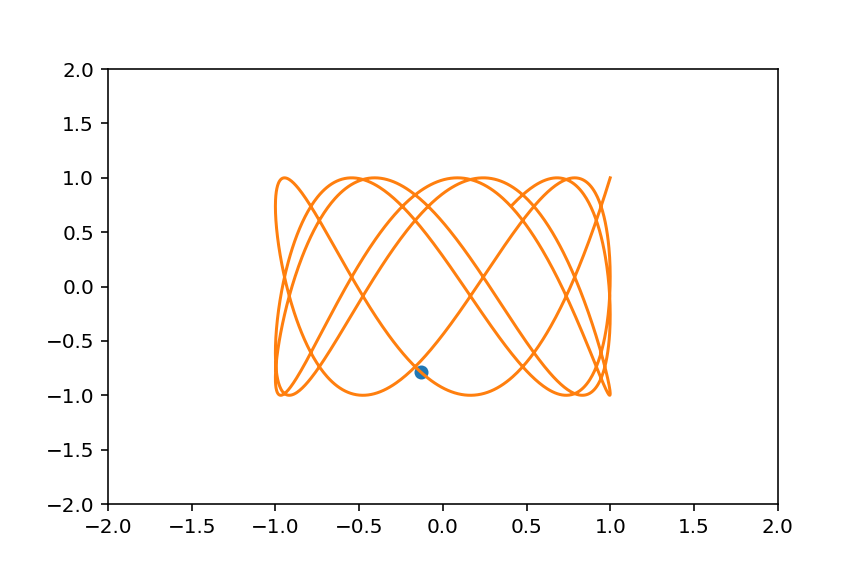

In [74]:
x0 = [1.0,1.0,0.0,0.0]
times = np.arange(0.,20,0.01)

# This computes the solution using scipy.integrate.odeint
omega = 5 # Try different values of omega, say omega = 1,2,4,5,9,10,16,17,20,25
sol = spi.odeint(HooksLawAnisotropic,x0,times,args=(omega,))

fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

line, = ax.plot([], [], "o-",lw=2)

# This plots the whole orbit
ax = plt.plot(sol[:,0],sol[:,1]) 

# This creates the animation over the orbit plot
xdata = []
ydata = []

def animate(i):
    global sol
    
    xdata = sol[i,0]
    ydata = sol[i,1]
    
    line.set_data(xdata,ydata)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=500,
                              interval=2, init_func=init)